<a href="https://colab.research.google.com/github/jferreiraz/ObjectIdentifier/blob/main/ObjectIdentifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pip install

In [ ]:
!pip install pyyaml==5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 274 kB 34.5 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=4373e931b4705cc4afc1eb74161312b4d6b1d2cf1233bf112bb937f7f3eec84e
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask 2022.2.0 requires pyyaml>=5.3.1, but you have pyyaml 5.1 which is incompatible.


In [ ]:
!pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 735.4 MB 15 kB/s 
     |████████████████████████████████| 12.8 MB 58.2 MB/s 
     |████████████████████████████████| 7.6 MB 18.0 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1+cu113
    Uninstalling torch-1.12.1+cu113:
      Successfully uninstalled torch-1.12.1+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.13.1+cu113
    Uninstalling torchvision-0.13.1+cu113:
      Successfully uninstalled torchvision-0.13.1+cu113
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.12.1+cu113
    Uninstalling torchaudio-0.12.1+cu113:
      Successfully uninstalled torchaudio-0.12.1+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed.

In [ ]:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
     |████████████████████████████████| 6.1 MB 590 kB/s 
     |████████████████████████████████| 79 kB 7.1 MB/s 
     |████████████████████████████████| 50 kB 6.6 MB/s 
     |████████████████████████████████| 151 kB 45.0 MB/s 
     |████████████████████████████████| 130 kB 68.3 MB/s 
     |████████████████████████████████| 843 kB 56.0 MB/s 
     |████████████████████████████████| 117 kB 67.7 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20220512-py3-none-any.whl size=61288 sha256=040f5f4450e7039d63f7cb6b31fb7eae896e5e27da1a4b521d0edee51a41f1dd
  Stored in directory: /root/.cache/pip/wheels/68/20/f9/a11a0dd63f4c13678b2a5ec488e48078756505c7777b75b29e
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144576 sha256=1467727a1e16daf627a

Library import

In [ ]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

1.7.1+cu101
True


In [ ]:
import detectron2

from detectron2.utils.logger import setup_logger
setup_logger()

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.utils.visualizer import ColorMode, Visualizer

import os
import cv2
from google.colab.patches import cv2_imshow

Image test

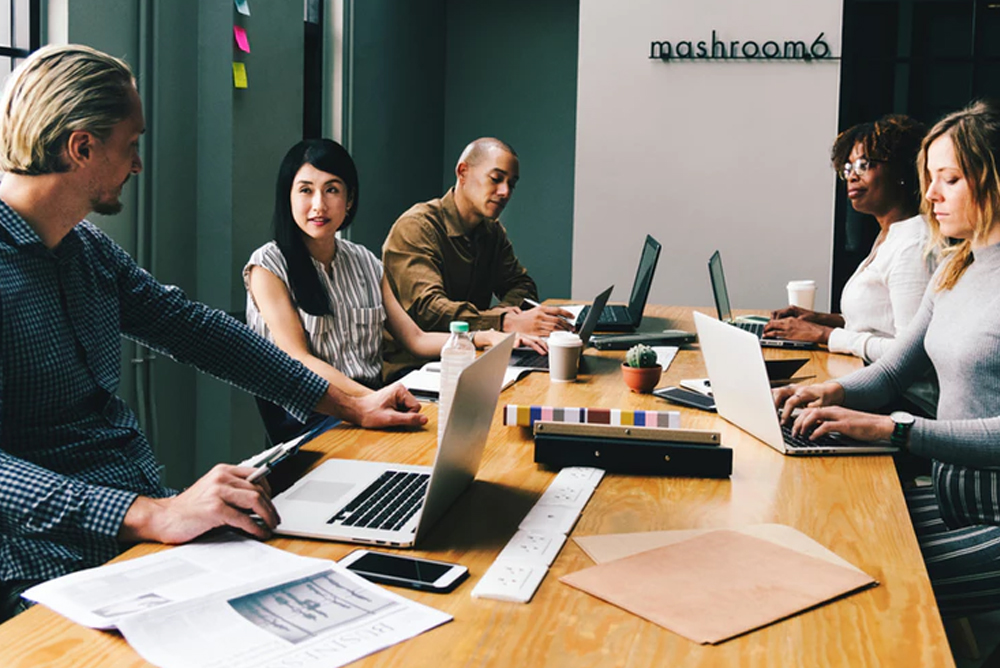

In [10]:
image = cv2.imread("./office.jpg") # Change the image here
cv2_imshow(image)

Setup

In [11]:
cfg = get_cfg()

#cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml")) #InstanceSegmentation/mask... can be exchange for Detection/faster...
#cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml") # 101_FPN can be exchanged for 50_FPN, 50_C4, 50_DC5, 101, 101_C4 ...

#cfg.merge_from_file(model_zoo.get_config_file("LVISv0.5-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_1x.yaml")) #The dataset can be changed too, in this line is used LVISv0.5 
#cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("LVISv0.5-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_1x.yaml")

cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")) 
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml") 


cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.6
#cfg.MODEL.DEVICE = "cuda" 

In [12]:
predictor = DefaultPredictor(cfg)
outputs = predictor(image)

model_final_cafdb1.pkl: 261MB [00:20, 12.9MB/s]                           
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}
/usr/local/lib/python3.7/dist-packages/detectron2/modeling/roi_heads/fast_rcnn.py:154: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  filter_inds = filter_mask.nonzero()


Scanning the image

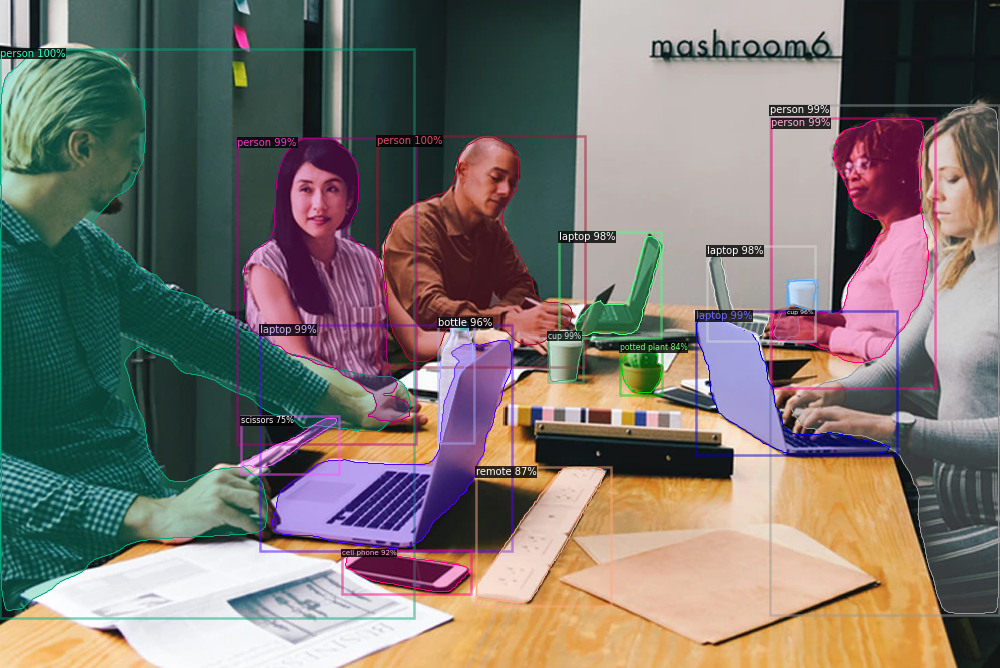

In [13]:
viz = Visualizer(image[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]),
instance_mode = ColorMode.IMAGE_BW)
output = viz.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(output.get_image()[:,:,::-1])


Listing classes

In [14]:
classes = predictor.metadata.thing_classes
print(classes)

# print(classes.index('cell phone'))

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


# Identified information

In [15]:
detections = predictor(image)
instances = detections["instances"].to("cpu")
instances = instances.pred_classes
quantity = len(instances)
identifiedArray = []

**With all the elements found**

In [24]:
ELEMENT = 'person'    # Change here the element you want to search >>> It's important that the name is in the list of classes and is exactly the same <<<
identifiedArray = []

print(f"The image identified {quantity} object(s):\n" )

for identifiedThings in instances:
  print(" • "+classes[identifiedThings])

for identifiedThings in instances:
  identifiedArray.append(classes[identifiedThings])

if(ELEMENT in classes):
  if ELEMENT in identifiedArray:
    elementQuantity = identifiedArray.count(ELEMENT)
    print(f"\nThe element '{ELEMENT}' has {elementQuantity} ocurrence(s)")
  else:
    print(f"\nThe element {ELEMENT} had no ocurrence")
else:
  print(f"\nThe element {ELEMENT} wasn't defined on dataset")

The image identified 16 object(s):

 • person
 • person
 • laptop
 • person
 • laptop
 • cup
 • person
 • person
 • laptop
 • laptop
 • bottle
 • cup
 • cell phone
 • remote
 • potted plant
 • scissors

The element 'person' has 5 ocurrence(s)


**Without element preseted**

In [17]:
#Without element preseted

print(f"The image identified {quantity} different things: " )
#print(detections)

for identifiedThings in instances:
  print(" → "+classes[identifiedThings])

The image identified 16 different things: 
 → person
 → person
 → laptop
 → person
 → laptop
 → cup
 → person
 → person
 → laptop
 → laptop
 → bottle
 → cup
 → cell phone
 → remote
 → potted plant
 → scissors


**Only with predefined elements**

In [18]:
#Only elements preseteds
ELEMENT = 'person'
identifiedArray = []

for identifiedThings in instances:
  identifiedArray.append(classes[identifiedThings])

if ELEMENT in identifiedArray:
  quantidade = identifiedArray.count(ELEMENT)
  print(f"Your object was identified {quantidade} time(s)")
else:
  print("Your object wasn't identified")

#identifiedArray

Your object was identified 5 time(s)
